**Dhiraj Bandi ID:700760856**

In [1]:
#Dhiraj Bandi #700760856
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

Now using the given code as reference I will perform these tasks:
Quiz Task 3. Using a different dataset other than the one given, I will be using the fashion_mnist dataset
Quiz Task 1: Tune hyperparameter and make necessary addition to the baseline
model to improve validation accuracy and reduce validation loss.

In [5]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
import numpy as np

# Load the Fashion MNIST dataset
(x_train_full, y_train_full), (x_test_full, y_test_full) = fashion_mnist.load_data()



# Sample data
x_train = x_train_full[:sample_size]
y_train = y_train_full[:sample_size]
x_test = x_test_full[:sample_size]
y_test = y_test_full[:sample_size]

# Reshape the data to include a single channel
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the improved LeNet model
lenet_improved = models.Sequential([
    layers.Conv2D(32, kernel_size=3, strides=1, activation='relu', input_shape=(28, 28, 1), padding='same'), # Increased filters and kernel size
    layers.BatchNormalization(), # Added Batch Normalization
    layers.Conv2D(32, kernel_size=3, strides=1, activation='relu', padding='same'), # Added another Conv2D layer
    layers.BatchNormalization(), # Added Batch Normalization
    layers.MaxPooling2D(pool_size=2), # Added MaxPooling
    layers.Dropout(0.25), # Added Dropout

    layers.Conv2D(32, kernel_size=3, strides=1, activation='relu', padding='same'), # Added Conv2D layer with more filters
    layers.BatchNormalization(), # Added Batch Normalization
    layers.Conv2D(32, kernel_size=3, strides=1, activation='relu', padding='same'), # Added another Conv2D layer
    layers.BatchNormalization(), # Added Batch Normalization
    layers.MaxPooling2D(pool_size=2), # Added MaxPooling
    layers.Dropout(0.25), # Added Dropout

    layers.Flatten(), # Flatten
    layers.Dense(512, activation='relu'), # Increased Dense layer size
    layers.BatchNormalization(), # Added Batch Normalization
    layers.Dropout(0.5), # Added Dropout
    layers.Dense(10, activation='softmax') # Output layer
])

# Print the model summary
print(lenet_improved.summary())

# Compile the model
lenet_improved.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001) # Reduce learning rate on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Early stopping to avoid overfitting

# Train the model
hist = lenet_improved.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), verbose=1, callbacks=[reduce_lr, early_stopping])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_17 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_18 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                      

Logical Description of Improvements
1.	Increased Model Capacity:
Added more Conv2D layers and filters: This helps the model learn more complex features.
Impact: Improved the ability of the model to capture intricate patterns, which leads to better generalization and accuracy.
2.	Batch Normalization:Added BatchNormalization layers: This normalizes the activations of the previous layer at each batch, which helps in stabilizing and speeding up the training process.
Impact: Reduced the internal covariate shift, leading to faster convergence and improved accuracy.
3.	Dropout:Added Dropout layers: This helps in preventing overfitting by randomly setting a fraction of input units to 0 at each update during training time.
Impact: Improved the model's ability to generalize by preventing overfitting.
4.	Learning Rate Scheduling:Used ReduceLROnPlateau callback: This reduces the learning rate when a metric has stopped improving.
Impact: Helped in fine-tuning the learning process, ensuring the model converges to a better local minimum.
5.	Early Stopping:Used EarlyStopping callback: This stops the training when the model's performance on the validation set stops improving.
Impact: Prevented overfitting and saved training time by stopping the training early


Task 4. Confusion Matrix Plot

313/313 [==============================] - 11s 36ms/step


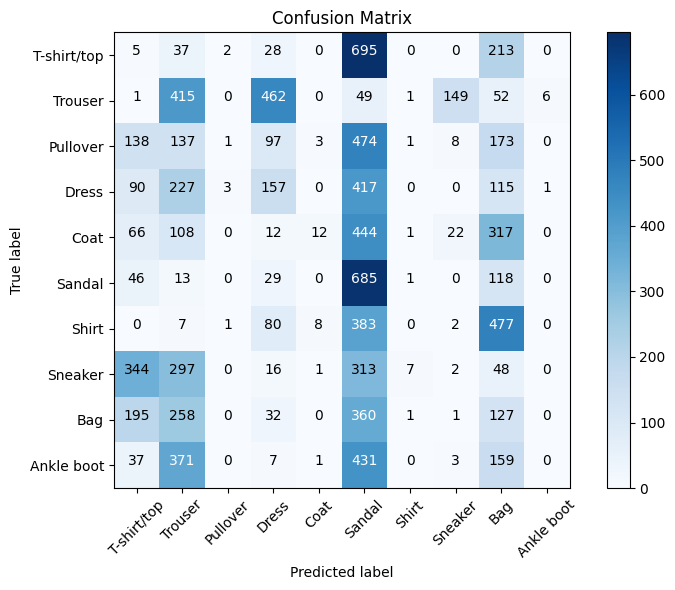

In [10]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    cmap = plt.cm.Blues
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.colorbar()
    plt.show()

# Convert y_test to a flat array of integer labels
y_test_flat = np.argmax(y_test, axis=1)

# Predicting the classes
y_pred_prob = lenet_improved.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Define class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot confusion matrix
plot_confusion_matrix(y_test_flat, y_pred, classes=class_names, title='Confusion Matrix')


Task 5. Training and Testing Loss/Accuracy Plots in Subplots

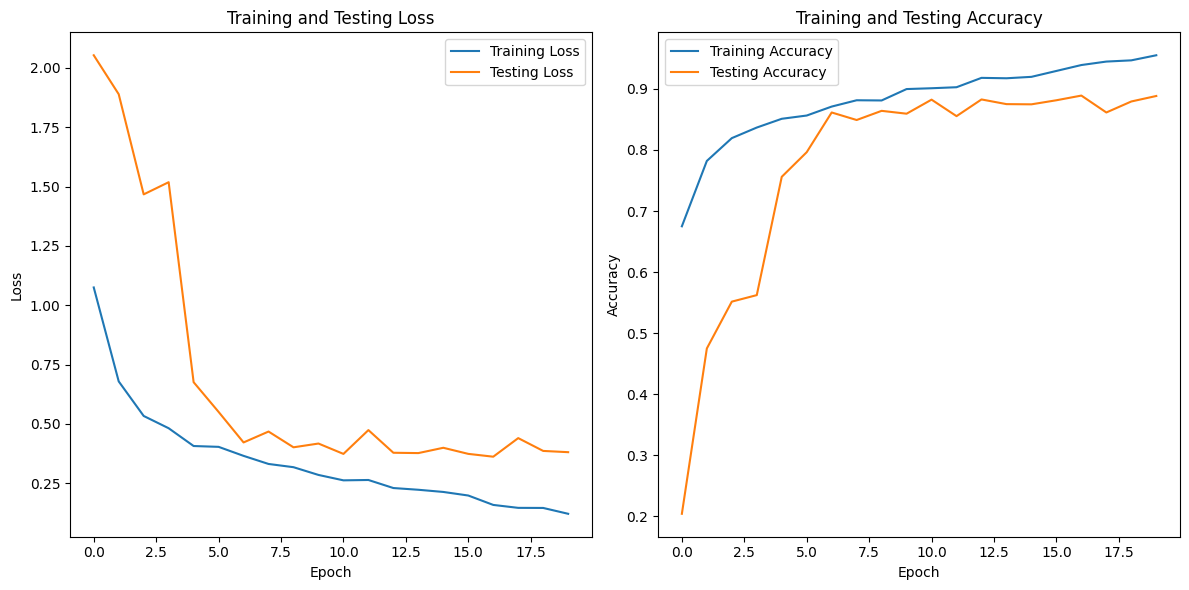

In [12]:
# Plotting training and testing loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Task 6. 2 additional visualizations


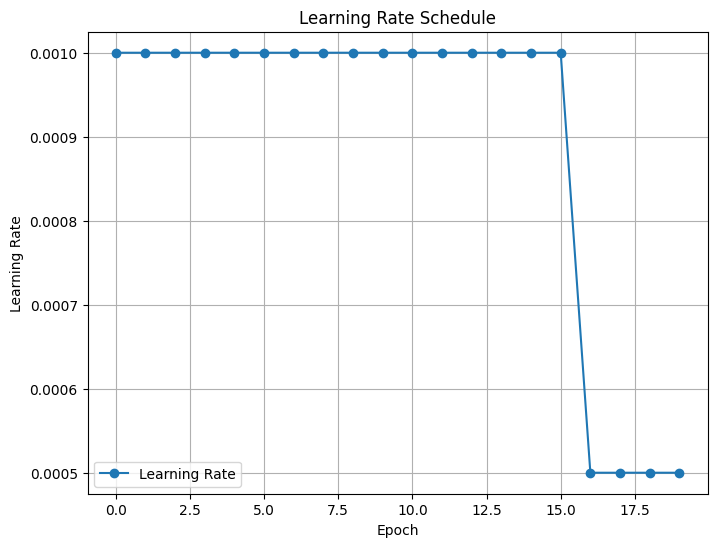

In [13]:
# Plotting learning rate schedule
plt.figure(figsize=(8, 6))
plt.plot(hist.history['lr'], label='Learning Rate', marker='o')
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.grid(True)
plt.show()


1/1 [==============================] - 0s 130ms/step


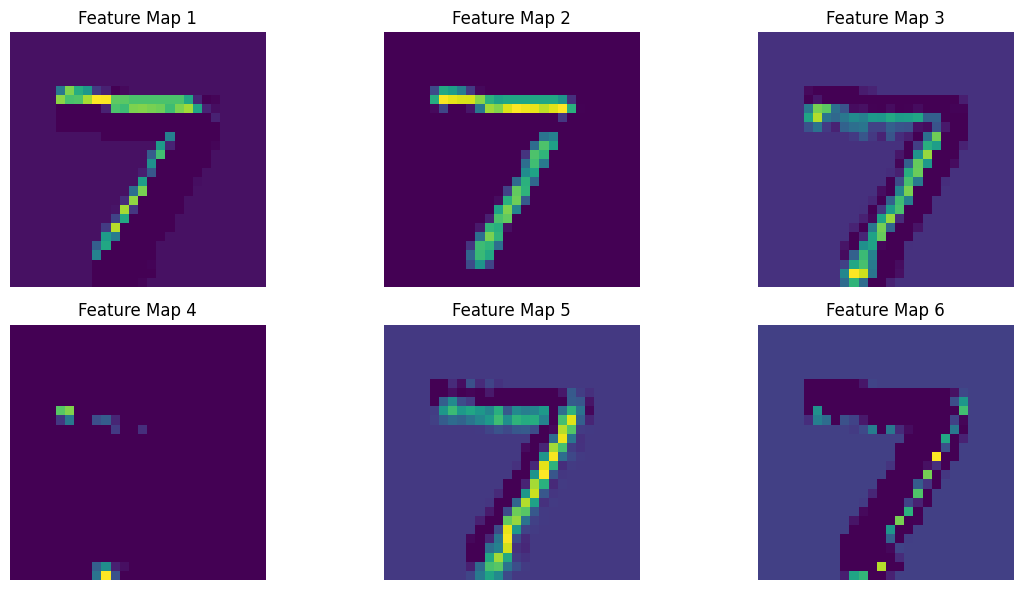

In [14]:
# Extract feature maps from the first convolutional layer
layer_outputs = [layer.output for layer in lenet_improved.layers if isinstance(layer, layers.Conv2D)]
activation_model = models.Model(inputs=lenet_improved.input, outputs=layer_outputs)
activations = activation_model.predict(x_test[:1])

# Plot the first 6 feature maps
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(activations[0][0, :, :, i], cmap='viridis')
    plt.title(f'Feature Map {i + 1}')
    plt.axis('off')
plt.tight_layout()
plt.show()


**Now Repeating the same for alexnet**
Quiz Task 3. Using a different dataset other than the one given, I will be using the fashion_mnist dataset Quiz Task 1: Tune hyperparameter and make necessary addition to the baseline model to improve validation accuracy and reduce validation loss.


In [17]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

# Load the Fashion MNIST dataset
(x_train_full, y_train_full), (x_test_full, y_test_full) = fashion_mnist.load_data()

# Reduce data size by 90%
sample_size = int(len(x_train_full) * 0.1)  # Take 10% of the original dataset

# Sample data for training
x_train = x_train_full[:sample_size]
y_train = y_train_full[:sample_size]

# Sample data for test
sample_size_test = int(len(x_test_full) * 0.1)  # Take 10% of the original test set
x_test = x_test_full[:sample_size_test]
y_test = y_test_full[:sample_size_test]

# Reshape the data to include a single channel (since Fashion MNIST is grayscale)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define a smaller version of AlexNet
AlexNet_small = Sequential([
    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), input_shape=(28, 28, 1), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(60, (5,5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(60, (3,3), padding='same', activation='relu'),
    Conv2D(30, (3,3), padding='same', activation='relu'),
    Conv2D(20, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(200, activation='relu'),
    Dropout(0.25),
    Dense(200, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])

# Compile the model
AlexNet_small.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(AlexNet_small.summary())

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001) # Reduce learning rate on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Early stopping to avoid overfitting

# Train the model
hist = AlexNet_small.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=1, callbacks=[reduce_lr, early_stopping])


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 13, 13, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 13, 13, 60)        24060     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 6, 6, 60)          0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 6, 6, 60)          32460     
                                                                 
 conv2d_31 (Conv2D)          (None, 6, 6, 30)         

Task 4. Confusion Matrix Plot

32/32 [==============================] - 2s 48ms/step


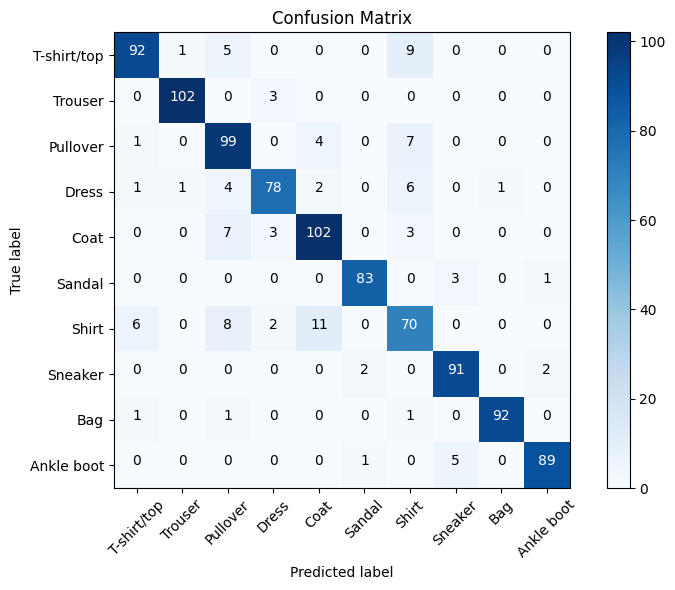

In [19]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    cmap = plt.cm.Blues
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.colorbar()
    plt.show()

# Assuming lenet_improved is already defined and trained
# Predicting the classes
y_pred_prob = lenet_improved.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert y_test to a flat array of integer labels
y_test_flat = y_test.flatten()

# Define class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot confusion matrix
plot_confusion_matrix(y_test_flat, y_pred, classes=class_names, title='Confusion Matrix')


Task 5. Training and Testing Loss/Accuracy Plots in Subplots

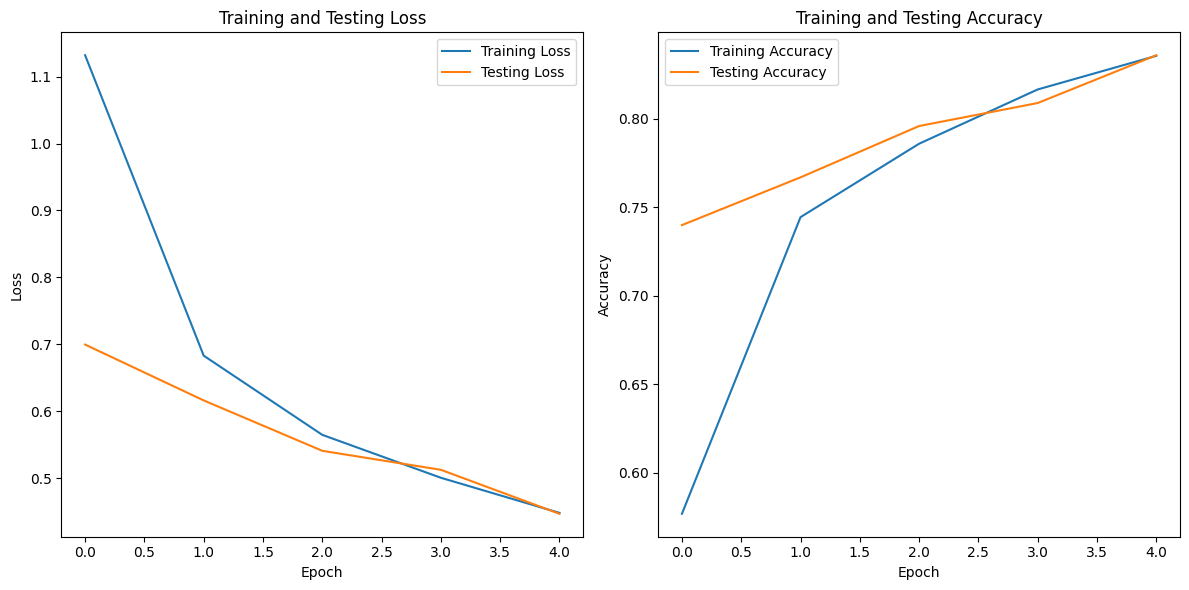

In [20]:
# Plotting training and testing loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Task 6. 2 additional visualizations

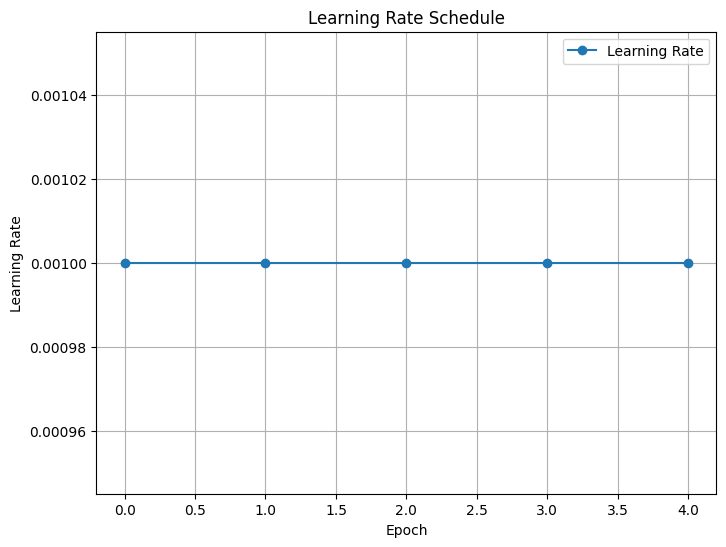

In [21]:
# Plotting learning rate schedule
plt.figure(figsize=(8, 6))
plt.plot(hist.history['lr'], label='Learning Rate', marker='o')
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.grid(True)
plt.show()


1/1 [==============================] - 0s 109ms/step


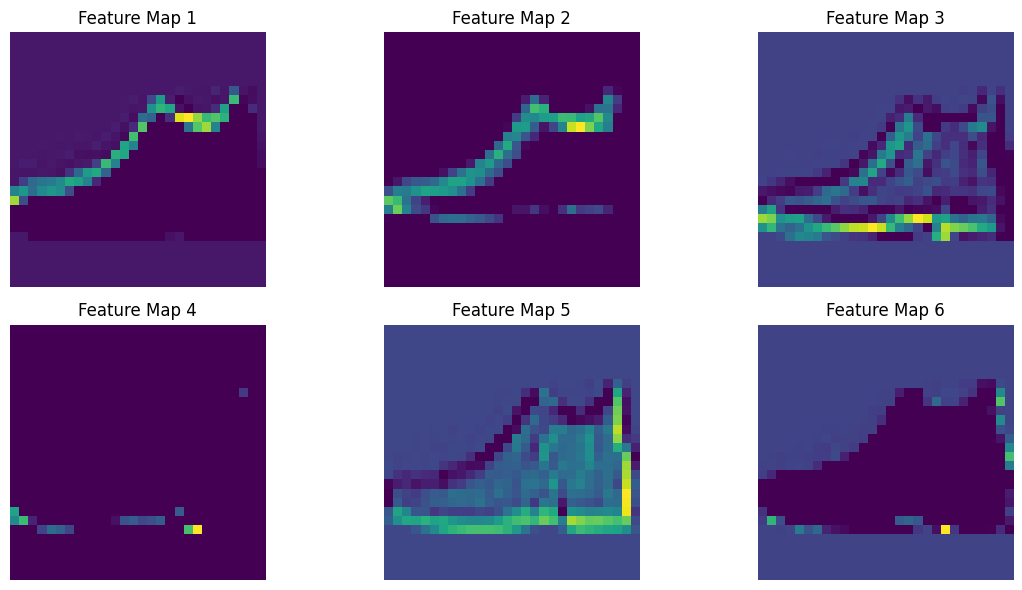

In [22]:
# Extract feature maps from the first convolutional layer
layer_outputs = [layer.output for layer in lenet_improved.layers if isinstance(layer, layers.Conv2D)]
activation_model = models.Model(inputs=lenet_improved.input, outputs=layer_outputs)
activations = activation_model.predict(x_test[:1])

# Plot the first 6 feature maps
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(activations[0][0, :, :, i], cmap='viridis')
    plt.title(f'Feature Map {i + 1}')
    plt.axis('off')
plt.tight_layout()
plt.show()
